In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x = df.drop(columns = ["Outcome"])
y = df["Outcome"]

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.decomposition import TruncatedSVD

In [7]:
svd = TruncatedSVD()
xtrain = svd.fit_transform(xtrain)
xtest = svd.fit_transform(xtest)

In [8]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
ypred  = model.predict(xtest)

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
accuracy_score(ytest,ypred)

0.7597402597402597

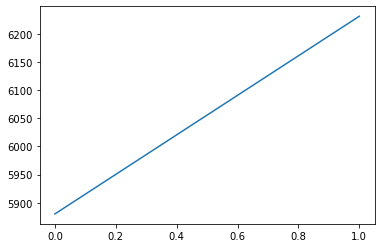

In [11]:
plt.plot(svd.explained_variance_)

In [13]:
comps = list(range(2,8))
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 0)
for i in comps:
    model = Pipeline([("svd",TruncatedSVD(n_components = i)),("lr",LogisticRegression())])
    model_fit = model.fit(xtrain,ytrain)
    ypred = model_fit.predict(xtrain)
    print("With Component", i ,"Accuracy Is:", accuracy_score(ytrain,ypred))

With Component 2 Accuracy Is: 0.7231270358306189
With Component 3 Accuracy Is: 0.7214983713355049
With Component 4 Accuracy Is: 0.742671009771987
With Component 5 Accuracy Is: 0.749185667752443
With Component 6 Accuracy Is: 0.7654723127035831
With Component 7 Accuracy Is: 0.7638436482084691


In [15]:
comps = list(range(2,8))
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 0)
for i in comps:
    model = Pipeline([("svd",TruncatedSVD(n_components = i)),("lr",LogisticRegression())])
    model_fit = model.fit(xtrain,ytrain)
    ypred = model_fit.predict(xtest)
    print("With Component", i ,"Accuracy Is:", accuracy_score(ytest,ypred))

With Component 2 Accuracy Is: 0.7727272727272727
With Component 3 Accuracy Is: 0.7532467532467533
With Component 4 Accuracy Is: 0.7402597402597403
With Component 5 Accuracy Is: 0.7597402597402597
With Component 6 Accuracy Is: 0.7987012987012987
With Component 7 Accuracy Is: 0.8116883116883117
